In [351]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [394]:
# load data
tobi_df = pd.read_csv('data/discography_Clairo.csv')
my_df_short = pd.read_csv('user_daviskeene_short_term.csv')

In [390]:
# Compute the standard deviations of the features in, in order to get the most important ones.
# feature list: danceability, acousticness, energy, instrumentalness, liveliness, speechiness
stds = list(my_df_short_new.std())
my_df_short_new.std()
print(list(my_mean))
def decreasing(x):
    return np.e ** (-2*x)

print(list(my_df_short_new.std()))
weights = [decreasing(x) for x in stds]
print(weights)
my_mean = [my_mean[i] / weights[i] for i in range(len(my_mean))]

[0.6470199999999999, 0.23096660599999996, 0.6590599999999999, 0.058641881, 0.21181200000000003, 0.10404599999999999]
[0.16154300495217858, 0.2575106510011167, 0.170037740108555, 0.1734551722266666, 0.1385058764538346, 0.11065066044603104]
[0.7239115881237392, 0.597487866794801, 0.7117166002116356, 0.7068687001166183, 0.7580455878183507, 0.8014751426968982]


In [391]:
# clean up data
cols_to_drop = ['Unnamed: 0', 'time_signature', 'release_date', 'popularity', 'tempo', 'length', 'loudness', 'danceability.1']
cols_to_augment = []

from numpy.linalg import norm

def sigmoid(x):
    return 1/(1 + np.exp(-x))

tobi_df_new = tobi_df.drop(columns=cols_to_drop)
tobi_df_new[cols_to_augment] = tobi_df_new[cols_to_augment].apply(sigmoid)
tobi_df_new._get_numeric_data()

my_df_short_new = my_df_short.drop(columns=cols_to_drop)
my_df_short_new[cols_to_augment] = my_df_short_new[cols_to_augment].apply(sigmoid)
my_df_short_new._get_numeric_data()

# get an average of all the columns for my songs
my_mean = my_df_short_new.mean()

# Get the similarity by getting the cartesian distance between points
distances = [distance_vector(list(tobi_df_new._get_numeric_data().loc[i]), my_mean) for i in range(tobi_df_new.shape[0])]
distances = [sum_z(list(tobi_df_new._get_numeric_data().loc[i]), my_mean, stds) for i in range(tobi_df_new.shape[0])]
tobi_df_new['daviskeene_similarity'] = distances
# Now, weigh similarity by how the "important" features are.
# stds = list(my_df_short_new.std())
# weights = [1-x for x in stds]
# c = .005
# scores = tobi_df_new['daviskeene_similarity'] * c + 
# tobi_df_new['daviskeene_similarity'] = tobi_df_new['daviskeene_similarity'] +

In [355]:
tobi_df_new.mean()

danceability             0.577762
acousticness             0.228755
energy                   0.537476
instrumentalness         0.110378
liveness                 0.233307
speechiness              0.039681
daviskeene_similarity    5.722165
dtype: float64

In [356]:
list(tobi_df_new._get_numeric_data().loc[0])

[0.456, 0.20199999999999999, 0.569, 0.0431, 0.0856, 0.0306, 3.9471606692776136]

In [357]:
def distance_vector(x, y):
    """
    Returns the cartesian distance between two vectors of size n
    """
    import math
    n = len(x)
    s = 0
    for i in range(n):
        s += (x[i] - y[i]) * (x[i] - y[i])
    return math.sqrt((s))



In [266]:
# Try using sum of z-scores as a metric
def sum_z(x, y, stdevs):
    """
    :param x: list of means
    :param y: song features
    :param stdevs: my stdevs
    """
    s = 0
    for i in range(len(x)):
        s += abs(y[i] - x[i]) / stdevs[i]
    return s

In [116]:
my_mean

[0.8937831782427607,
 0.38656283890585225,
 0.9260146521860276,
 0.0829600758815963,
 0.27941855134279364,
 0.12981812467682244]

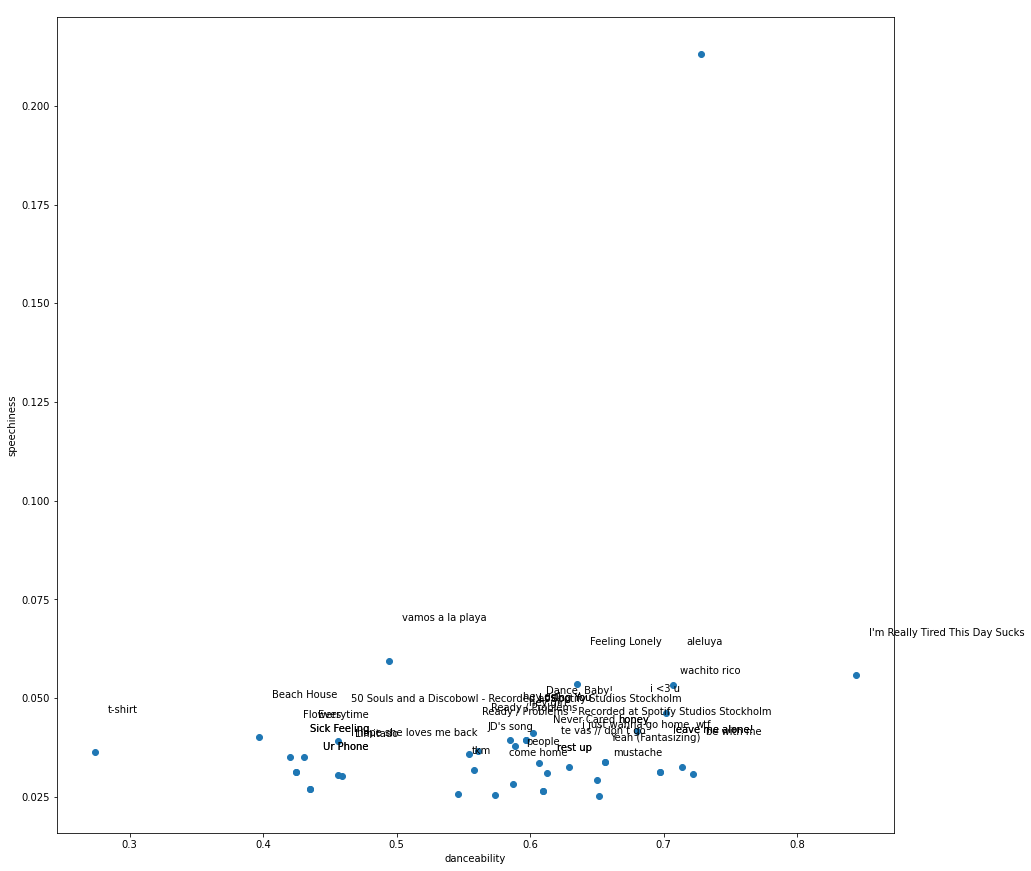

In [358]:
plt.figure(figsize=(15,15))
# Add the point labels
x = tobi_df_new['danceability']
y = tobi_df_new['speechiness']
plt.scatter(x, y)
pt_labels = tobi_df_new['name']
for i in range(len(pt_labels)):
    plt.annotate(pt_labels[i], (x[i]+.01,y[i]+.01))
plt.xlabel('danceability')
plt.ylabel('speechiness');

In [393]:
tobi_df_new.groupby('name').mean().sort_values(by='daviskeene_similarity', ascending=True)

,danceability,acousticness,energy,instrumentalness,liveness,speechiness,daviskeene_similarity
name,,,,,,,
Drown,0.6740,0.45500,0.6150,0.000910,0.20800,0.14700,2.044681
Impossible,0.4320,0.25500,0.6150,0.006190,0.12800,0.04940,3.084858
4EVER,0.7500,0.04900,0.5850,0.005520,0.15500,0.02850,3.178843
Better - SG Lewis x Clairo,0.6990,0.05000,0.5830,0.000290,0.09100,0.03570,3.298173
Sofia,0.7440,0.59800,0.6190,0.003720,0.23100,0.03900,3.304264
North,0.3520,0.24400,0.6320,0.000018,0.15300,0.04730,3.311450
Softly,0.7590,0.33000,0.4360,0.011300,0.10200,0.04190,4.017005
I Don’t Think I Can Do This Again (with Clairo),0.5800,0.00738,0.4340,0.000129,0.10500,0.04790,4.222651
Closer To You,0.7600,0.16400,0.3760,0.000473,0.10700,0.04260,4.271526
